In [3]:
# basic
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

%matplotlib inline
random_state_var = 101

from sklearn.metrics import mean_squared_error


## Предобработка данных

In [4]:
df_train = pd.read_csv('train.csv')

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


In [8]:
df_train.isnull().sum() #проверяем пропуски

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df_train.duplicated().sum() #проверяем дубликаты 

0

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
df_train['weight'].unique() 

array([ 62.  ,  85.  ,  64.  ,  82.  ,  56.  ,  67.  ,  93.  ,  95.  ,
        71.  ,  68.  ,  80.  ,  60.  ,  78.  , 112.  ,  75.  ,  52.  ,
        83.  ,  69.  ,  90.  ,  45.  ,  65.  ,  59.  ,  66.  ,  74.  ,
       105.  ,  73.  ,  55.  ,  70.  ,  72.  ,  63.  ,  50.  , 107.  ,
        84.  ,  77.  ,  79.  ,  76.  ,  58.  , 115.  ,  97.  ,  53.  ,
        57.  ,  49.  , 110.  ,  94.  ,  92.  ,  87.  , 103.  ,  88.  ,
        99.  , 100.  ,  61.  ,  48.  ,  54.  ,  51.  ,  47.  ,  91.  ,
       104.  ,  81.  ,  98.  , 108.  ,  89.  , 101.  ,  86.  ,  65.5 ,
       142.  ,  96.  ,  44.  ,  41.  , 169.  , 116.  , 200.  ,  64.8 ,
       120.  , 117.  , 125.  , 106.  , 114.  , 113.  , 129.  , 124.  ,
        42.  , 123.  , 111.  , 102.  , 109.  ,  46.  , 139.  , 150.  ,
       138.  , 131.  ,  43.  ,  83.6 , 134.  , 106.5 , 121.  ,  40.  ,
       141.  , 119.  , 126.  , 177.  , 165.  , 122.  ,  62.3 , 118.  ,
        89.5 , 132.  , 155.  , 130.  , 159.  ,  84.6 , 140.  ,  82.3 ,
      

In [12]:
#работаем с весом , меняем тип

In [13]:
df_train['weight']=df_train['weight'].astype('int64')

In [14]:
#исправление веса 

In [15]:
df_train.loc[df_train['weight']<0, 'weight'] = df_train['weight']*(-1)

In [16]:
df_train.loc[((df_train['weight']< 45)|(df_train['weight'] > 220)), 'weight']  = df_train['weight'].median()

In [17]:
#изучаем рост  и исправляем некорректные значения

In [18]:
df_train['height'].unique()

array([168, 156, 165, 169, 151, 157, 178, 158, 164, 173, 181, 172, 170,
       154, 162, 163, 153, 159, 166, 155, 160, 175, 171, 152, 187, 148,
       179, 180, 188, 185, 167, 183, 174, 176, 161, 184, 177, 182,  76,
       149, 142, 150, 144, 147, 186, 146, 141, 195, 140, 198, 145, 143,
       196, 138, 194, 190, 134, 136, 100, 120, 189, 137, 192, 122, 250,
       191, 117,  70,  97, 119, 130, 110, 193,  75, 132,  71, 135,  67,
       125, 139, 133,  74,  98, 112, 207,  68,  55,  81,  80,  64,  91,
        60, 109,  72, 197,  65, 128, 105, 108, 200, 104, 111, 113,  96,
       131,  59,  66,  99,  57])

In [19]:
df_train.loc[(df_train['height'] < 120), 'height']  = df_train['height'].median()

In [20]:
df_train['height'].unique()

array([168, 156, 165, 169, 151, 157, 178, 158, 164, 173, 181, 172, 170,
       154, 162, 163, 153, 159, 166, 155, 160, 175, 171, 152, 187, 148,
       179, 180, 188, 185, 167, 183, 174, 176, 161, 184, 177, 182, 149,
       142, 150, 144, 147, 186, 146, 141, 195, 140, 198, 145, 143, 196,
       138, 194, 190, 134, 136, 120, 189, 137, 192, 122, 250, 191, 130,
       193, 132, 135, 125, 139, 133, 207, 197, 128, 200, 131])

In [21]:
#работаем с давлением. 
#приводим все аномальные значения к более вероятным

In [22]:
df_train.loc[df_train['ap_lo'] < 0, 'ap_lo'] = df_train['ap_lo']*(-1)
df_train.loc[((df_train['ap_lo'] < 40)|(df_train['ap_lo'] > 180)), 'ap_lo'] = df_train['ap_lo'].median()

In [23]:
df_train.loc[df_train['ap_hi'] < 0, 'ap_hi'] = df_train['ap_hi']*(-1)
df_train.loc[((df_train['ap_hi'] > 250)&(df_train['ap_hi'] < 10000)), 'ap_hi'] = df_train['ap_hi']//10
df_train.loc[df_train['ap_hi'] >= 10000,'ap_hi'] = df_train['ap_hi']//100
df_train.loc[df_train['ap_hi'] < 60,'ap_hi'] = df_train['ap_hi'].median()

In [24]:
df_train['ap_hi'].unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125,  90, 180, 160,
       133, 190,  80, 122, 169, 126, 158, 200, 123,  70, 161, 147, 115,
       137, 153, 148, 105, 220, 119, 141, 165, 164, 124, 172, 162, 117,
       134, 166, 210, 176, 116, 121, 112, 159, 113, 118, 155, 142, 131,
       157, 136, 146, 138, 109,  85, 106, 129,  93,  95, 179, 156, 168,
       132, 104, 103, 178, 175, 128, 151, 139, 127, 108, 144, 102, 143,
       107, 184, 149, 167, 114, 101,  60, 181, 171, 202, 111, 188, 185,
       163, 173, 154, 177, 174, 240, 191, 197, 152,  96, 199, 193,  99,
       196, 230, 207, 215,  97, 195, 187])

In [25]:
df_train['ap_lo'].unique()

array([ 80,  90,  70, 100,  60,  85,  89, 110,  65,  63,  79, 120,  50,
       109,  84, 150,  91,  40,  73,  78,  75,  86,  87,  82,  95,  69,
        74,  97,  81,  83, 119,  93, 105,  99,  77,  59, 140,  92, 108,
       125, 115,  68,  61, 106, 102,  94,  66,  52, 170,  76, 160,  62,
        96, 130, 113,  67,  88, 112, 104,  71,  72,  98,  57, 101,  64,
        45,  58, 126, 103, 180, 121, 114,  53, 111, 118,  56, 107,  55,
       122, 135,  54,  49])

In [26]:
df_train['ap_hi'].value_counts()

120    27886
140     9515
130     8965
110     8645
150     4452
       ...  
197        1
181        1
184        1
202        1
187        1
Name: ap_hi, Length: 111, dtype: int64

In [27]:
df_train_tmp = df_train[['ap_hi','ap_lo']]
df_train['ap_hi'], df_train['ap_lo'] = df_train_tmp.max(axis=1), df_train_tmp.min(axis=1),

In [28]:
df_train['cholesterol'].unique()

array([1, 3, 2])

In [29]:
df_train['cardio'].unique()

array([0, 1])

In [30]:
df_train['age']= df_train['age']/364

In [31]:
df_train['age']= df_train['age'].round()

In [32]:
df_train['age'].unique()

array([51., 56., 52., 48., 60., 61., 62., 49., 54., 41., 40., 46., 59.,
       63., 64., 50., 58., 57., 55., 44., 53., 65., 47., 42., 39., 43.,
       45., 30.])

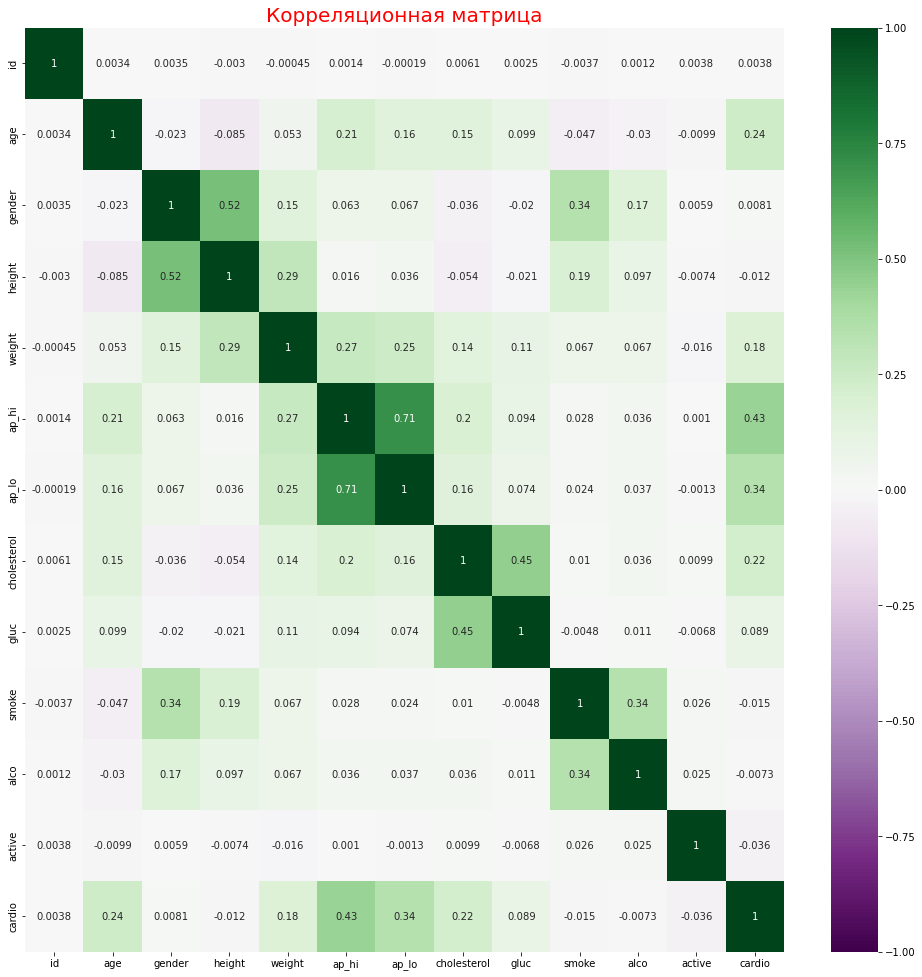

In [33]:
fig, ax = plt.subplots(figsize=(17,17))
hm = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='PRGn')
hm.set_title('Корреляционная матрица', fontdict={'fontsize': 20, 'color': 'red'})
plt.show()

In [34]:
x_train = df_train.drop(["cardio"], axis = 1)
y_train = df_train["cardio"]
x_test = df_test

In [ ]:
#обьединим для признака рост и вес 

In [35]:
x_test['imt']= (x_test['weight']//(x_test['height']/100)**2).astype('int')

In [36]:
x_train['imt']= (x_train['weight']//(x_train['height']/100)**2).astype('int')

In [37]:
x_train = x_train.drop(['weight', 'height', 'id'], axis=1)

In [38]:
x_test = x_test.drop(['weight', 'height', 'id'], axis=1)

In [39]:
y_train.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

##  Модель и подбор признаков для нее 

In [40]:
model_rfс = RandomForestClassifier(random_state=12345, 
                                   n_estimators=400, 
                                   bootstrap = True, 
                                   min_samples_split = 10,
                                   max_depth = 11, 
                                   min_samples_leaf = 10, 
                                   criterion = 'entropy')
model_rfс.fit(x_train, y_train) 
predictions_rfc = model_rfс.predict(x_test)
print(predictions_rfc)
probabilities = model_rfс.predict_proba(x_test)
print(probabilities)

[1 1 1 ... 1 1 1]
[[0.38029325 0.61970675]
 [0.35032358 0.64967642]
 [0.38738482 0.61261518]
 ...
 [0.36407824 0.63592176]
 [0.3418206  0.6581794 ]
 [0.2653167  0.7346833 ]]


In [41]:
res = df_test 
res['cardio'] = probabilities[:,1]
res = res[['id', 'cardio']]
res.to_csv('submission12345.csv', index=False)
res

,id,cardio
0,5,0.619707
1,6,0.649676
2,7,0.612615
3,10,0.649620
4,11,0.515521
...,...,...
29995,99984,0.866126
29996,99987,0.464709
29997,99989,0.635922
29998,99994,0.658179
